## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [19]:
LEARNING_RATE = 1e-3
EPOCHS = 80
BATCH_SIZE = 1024
MOMENTUM = 0.95
Stop_step=[2,5,10,25]

In [20]:
from keras.callbacks import EarlyStopping
results = {}
for stop in Stop_step:
    earlystop = EarlyStopping(monitor="val_acc",patience=stop, verbose=1)
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with stopstep = %.6f" % (stop))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[earlystop]
             )
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "Earlystop-step-%s" % str(stop)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with stopstep = 2.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)

Epoch 19/80
50000/50000 [==============================] - 2s 40us/step - loss: 1.0773 - acc: 0.6316 - val_loss: 1.4690 - val_acc: 0.4923
Epoch 20/80
50000/50000 [==============================] - 2s 40us/step - loss: 1.0561 - acc: 0.6409 - val_loss: 1.4498 - val_acc: 0.4922
Epoch 21/80
50000/50000 [==============================] - 2s 40us/step - loss: 1.0345 - acc: 0.6506 - val_loss: 1.4646 - val_acc: 0.4922
Epoch 22/80
50000/50000 [==============================] - 2s 41us/step - loss: 1.0131 - acc: 0.6561 - val_loss: 1.4566 - val_acc: 0.4954
Epoch 23/80
50000/50000 [==============================] - 2s 40us/step - loss: 0.9920 - acc: 0.6646 - val_loss: 1.4621 - val_acc: 0.4947
Epoch 24/80
50000/50000 [==============================] - 2s 39us/step - loss: 0.9713 - acc: 0.6760 - val_loss: 1.4603 - val_acc: 0.4947
Epoch 25/80
50000/50000 [==============================] - 2s 40us/step - loss: 0.9511 - acc: 0.6816 - val_loss: 1.4743 - val_acc: 0.4921
Epoch 26/80
50000/50000 [=========

Train on 50000 samples, validate on 10000 samples
Epoch 1/80
50000/50000 [==============================] - 3s 52us/step - loss: 2.2251 - acc: 0.2733 - val_loss: 2.1214 - val_acc: 0.3277
Epoch 2/80
50000/50000 [==============================] - 2s 40us/step - loss: 1.7492 - acc: 0.3937 - val_loss: 1.8760 - val_acc: 0.3684
Epoch 3/80
50000/50000 [==============================] - 2s 41us/step - loss: 1.6222 - acc: 0.4359 - val_loss: 1.6927 - val_acc: 0.4109
Epoch 4/80
50000/50000 [==============================] - 2s 40us/step - loss: 1.5471 - acc: 0.4608 - val_loss: 1.6239 - val_acc: 0.4308
Epoch 5/80
50000/50000 [==============================] - 2s 40us/step - loss: 1.4898 - acc: 0.4807 - val_loss: 1.6090 - val_acc: 0.4402
Epoch 6/80
50000/50000 [==============================] - 2s 39us/step - loss: 1.4446 - acc: 0.4965 - val_loss: 1.5701 - val_acc: 0.4568
Epoch 7/80
50000/50000 [==============================] - 2s 39us/step - loss: 1.4045 - acc: 0.5096 - val_loss: 1.5474 - val_acc

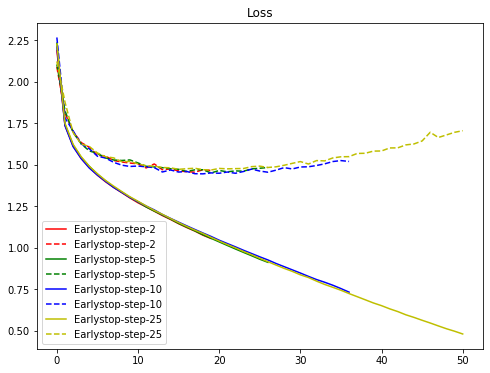

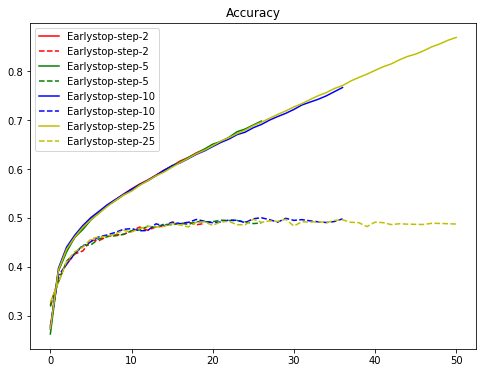

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc="best")
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc="best")
plt.show()